In [1]:
import re
import numpy as np
import pandas as pd
import tabata as tbt
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import Projet_rectangularisation_vols as m2d 

%reload_ext autoreload
%autoreload 2


# Chargement des données.
datadir = "../Data/cleaned/"
final_file = datadir + "AFL1EB_cleaned_final.h5"
norm_file = datadir + "AFL1EB_normed_alt.h5"
ds = tbt.Opset(final_file)
ds

OPSET '../Data/cleaned/AFL1EB_cleaned_final.h5' de 47 signaux.
        position courante : sigpos  = 0
        variable courante : colname = ALT[m]
        phase surlignée   : phase   = None

In [2]:
df = ds[23]
y = df['ALT[m]'].values
n = len(y)
t = np.arange(0,n)
df.index.name
t1 = np.max(np.argwhere((y<y[0]+10) & (t<n/3)))
t4 = np.min(np.argwhere((y<y[-1]+10) & (t>2*n/3)))

In [3]:
dy = np.append(np.diff(y),0)
k = 3
dyc = np.convolve(dy,np.ones(2*k+1)/(2*k+1))
dyc = dyc[k:-k]
mx = np.max(y)
tx = np.argwhere(y==mx)
txm = (tx[0]+tx[-1])/2
t2 = np.min(np.argwhere((y>mx-mx/10) & (dyc<2.5) & (t>t1) & (t<txm)))
t3 = np.max(np.argwhere((y>mx-mx/10) & (dyc>-2.5) & (t<t4) & (t>txm)))

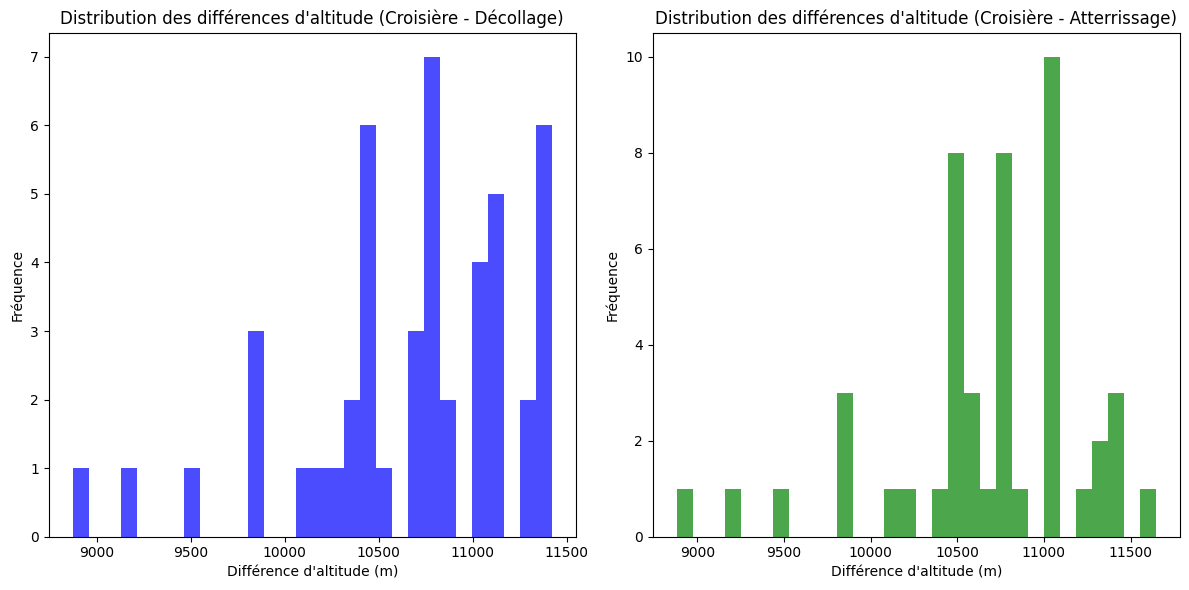

Statistiques pour la différence (Croisière - Décollage) :
count       47.000000
mean     10668.446241
std        580.717982
min       8870.488367
25%      10455.690060
50%      10761.693829
75%      11087.459646
max      11421.117348
dtype: float64

Statistiques pour la différence (Croisière - Atterrissage) :
count       47.000000
mean     10667.528988
std        575.813413
min       8881.900079
25%      10456.931304
50%      10760.492549
75%      11060.946989
max      11647.113758
dtype: float64


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Liste pour stocker les résultats des différences d'altitude
diff_croisiere_decollage = []
diff_croisiere_atterrissage = []

# Itérer à travers les enregistrements dans le dataset
for df in ds:
    # Extraire les points de changement de phase (t1, t2, t3, t4)
    t1, t2, t3, t4 = m2d.compute_points(df)
    
    # Extraire les altitudes aux points de changement
    alt_decollage = df['ALT[m]'].iloc[t1]
    alt_croisiere = df['ALT[m]'].iloc[t2:t3+1].mean()  # Moyenne de la phase de croisière
    alt_atterrissage = df['ALT[m]'].iloc[t4]
    
    # Calculer la différence d'altitude pour croisière - décollage
    diff_croisiere_decollage.append(alt_croisiere - alt_decollage)
    
    # Calculer la différence d'altitude pour croisière - atterrissage
    diff_croisiere_atterrissage.append(alt_croisiere - alt_atterrissage)

# Convertir les listes en tableaux numpy pour faciliter l'analyse
diff_croisiere_decollage = np.array(diff_croisiere_decollage)
diff_croisiere_atterrissage = np.array(diff_croisiere_atterrissage)

# Visualiser la distribution des différences d'altitude
plt.figure(figsize=(12, 6))

# Histogramme des différences d'altitude entre la croisière et le décollage
plt.subplot(1, 2, 1)
plt.hist(diff_croisiere_decollage, bins=30, color='blue', alpha=0.7)
plt.title("Distribution des différences d'altitude (Croisière - Décollage)")
plt.xlabel("Différence d'altitude (m)")
plt.ylabel("Fréquence")

# Histogramme des différences d'altitude entre la croisière et l'atterrissage
plt.subplot(1, 2, 2)
plt.hist(diff_croisiere_atterrissage, bins=30, color='green', alpha=0.7)
plt.title("Distribution des différences d'altitude (Croisière - Atterrissage)")
plt.xlabel("Différence d'altitude (m)")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# Calculer les statistiques descriptives pour les deux différences
df_diff_croisiere_decollage = pd.Series(diff_croisiere_decollage)
df_diff_croisiere_atterrissage = pd.Series(diff_croisiere_atterrissage)

print("Statistiques pour la différence (Croisière - Décollage) :")
print(df_diff_croisiere_decollage.describe())

print("\nStatistiques pour la différence (Croisière - Atterrissage) :")
print(df_diff_croisiere_atterrissage.describe())


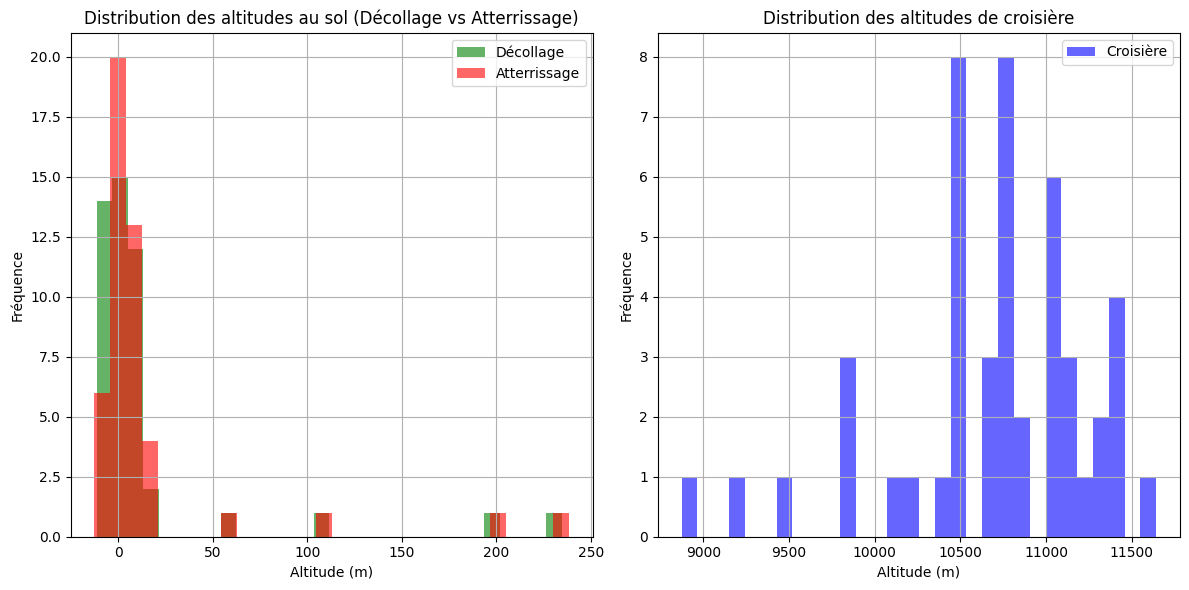

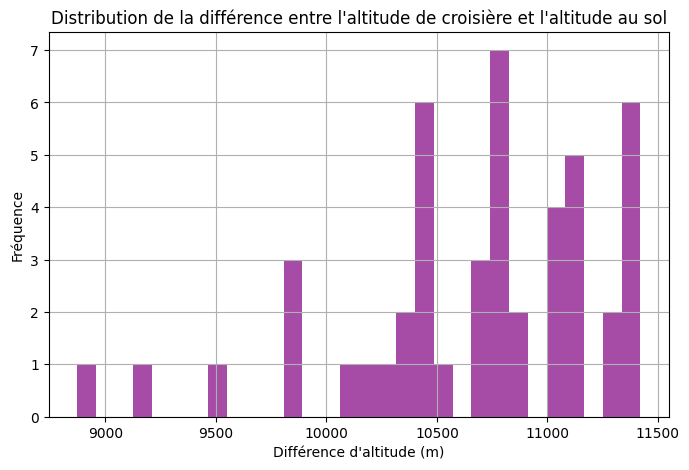

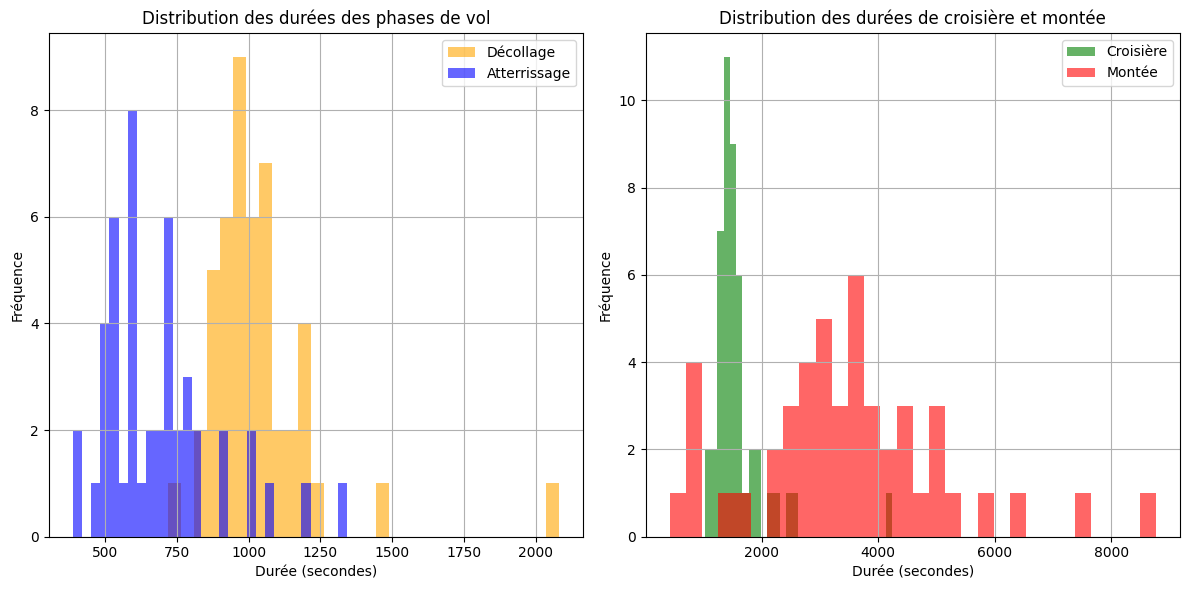

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Listes pour stocker les données calculées
altitudes_sol_decollage = []
altitudes_sol_atterrissage = []
altitudes_croisiere_moyenne = []
diff_alt_sol_croisiere = []
durees_phases = []

# Itérer à travers les vols dans le dataset
for df in ds:
    # Extraire les points de changement de phase (t1 = décollage, t2 = montée, t3 = croisière, t4 = descente, atterrissage)
    t1, t2, t3, t4 = m2d.compute_points(df)
    
    # Vérification de la validité des indices
    if t1 is None or t2 is None or t3 is None or t4 is None:
        continue  # Passer ce vol si les indices sont invalides

    # Altitude au sol (décollage et atterrissage)
    alt_decollage = df['ALT[m]'].iloc[t1]
    alt_atterrissage = df['ALT[m]'].iloc[t4]
    
    # Calcul de l'altitude moyenne de croisière entre t2 et t3
    alt_croisiere = np.mean(df['ALT[m]'].iloc[t2:t3])
    
    # Calcul de la différence entre l'altitude de croisière et les altitudes de sol
    diff_sol_croisiere = alt_croisiere - alt_decollage
    diff_alt_sol_croisiere.append(diff_sol_croisiere)
    
    # Enregistrer les altitudes pour la distribution
    altitudes_sol_decollage.append(alt_decollage)
    altitudes_sol_atterrissage.append(alt_atterrissage)
    altitudes_croisiere_moyenne.append(alt_croisiere)
    
    # Calcul des durées des phases
    duree_decollage = df.index[t2] - df.index[t1]
    duree_montée = df.index[t3] - df.index[t2]
    duree_croisiere = df.index[t4] - df.index[t3]
    duree_descente = df.index[-1] - df.index[t4]
    
    # Enregistrer les durées
    durees_phases.append([duree_decollage.total_seconds(), duree_montée.total_seconds(),
                          duree_croisiere.total_seconds(), duree_descente.total_seconds()])

# Convertir les listes en tableaux numpy pour l'analyse statistique
altitudes_sol_decollage = np.array(altitudes_sol_decollage)
altitudes_sol_atterrissage = np.array(altitudes_sol_atterrissage)
altitudes_croisiere_moyenne = np.array(altitudes_croisiere_moyenne)
diff_alt_sol_croisiere = np.array(diff_alt_sol_croisiere)

# Calcul des durées des phases (en secondes)
durees_phases = np.array(durees_phases)

# Visualisation de la distribution des altitudes au sol et de croisière
plt.figure(figsize=(12, 6))

# Distribution des altitudes au sol (Décollage vs Atterrissage)
plt.subplot(1, 2, 1)
plt.hist(altitudes_sol_decollage, bins=30, color='green', alpha=0.6, label="Décollage")
plt.hist(altitudes_sol_atterrissage, bins=30, color='red', alpha=0.6, label="Atterrissage")
plt.title("Distribution des altitudes au sol (Décollage vs Atterrissage)")
plt.xlabel("Altitude (m)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid()

# Distribution des altitudes de croisière
plt.subplot(1, 2, 2)
plt.hist(altitudes_croisiere_moyenne, bins=30, color='blue', alpha=0.6, label="Croisière")
plt.title("Distribution des altitudes de croisière")
plt.xlabel("Altitude (m)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Visualisation de la distribution de la différence entre l'altitude de croisière et les altitudes au sol
plt.figure(figsize=(8, 5))
plt.hist(diff_alt_sol_croisiere, bins=30, color='purple', alpha=0.7)
plt.title("Distribution de la différence entre l'altitude de croisière et l'altitude au sol")
plt.xlabel("Différence d'altitude (m)")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

# Visualisation de la distribution des durées des phases
durees_decollage = durees_phases[:, 0]
durees_montée = durees_phases[:, 1]
durees_croisiere = durees_phases[:, 2]
durees_descente = durees_phases[:, 3]

plt.figure(figsize=(12, 6))

# Distribution des durées des phases de vol (décollage et atterrissage)
plt.subplot(1, 2, 1)
plt.hist(durees_decollage, bins=30, color='orange', alpha=0.6, label="Décollage")
plt.hist(durees_descente, bins=30, color='blue', alpha=0.6, label="Atterrissage")
plt.title("Distribution des durées des phases de vol")
plt.xlabel("Durée (secondes)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid()

# Distribution des durées de croisière et montée
plt.subplot(1, 2, 2)
plt.hist(durees_croisiere, bins=30, color='green', alpha=0.6, label="Croisière")
plt.hist(durees_montée, bins=30, color='red', alpha=0.6, label="Montée")
plt.title("Distribution des durées de croisière et montée")
plt.xlabel("Durée (secondes)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
